# Project: Health Care

In [2]:
# perform all necessary library import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_excel("1645792390_cep1_dataset.xlsx")
dataset.shape

(303, 14)

The dataset contains 303 rows and 14 features(columns)

In [4]:
# Viewing the dataset 
dataset.sample(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
90,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3,0
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3,0
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0


Dataset has 13 features and 1 target variable

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


All the features are in numerical datatypes, though some may be ordinal features

In [6]:
#Checking for missing values

dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No missing values are in the dataset

In [7]:
dataset.duplicated().sort_values()

0      False
205    False
204    False
203    False
202    False
       ...  
97     False
96     False
102    False
302    False
164     True
Length: 303, dtype: bool

row 164 is duplicated which we will remove

In [8]:
dataset.drop_duplicates(inplace=True)
dataset.duplicated().any()


False

In [9]:
#preliminary statistical summary of the data

dataset.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
#Identify the data variables which are categorical
#describe and explore these variables using the appropriate tools, such as count plot

# Picking features based on values which are less than 10
categorical_features = dataset.loc[:, (dataset < 10).any()].columns.to_list()
categorical_features

['sex',
 'cp',
 'fbs',
 'restecg',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [11]:
dataset[categorical_features].nunique()

sex         2
cp          4
fbs         2
restecg     3
exang       2
oldpeak    40
slope       3
ca          5
thal        4
target      2
dtype: int64

In [12]:
# Dropping oldpeak as it contains over 40 unique entries
categorical_features.remove('oldpeak')

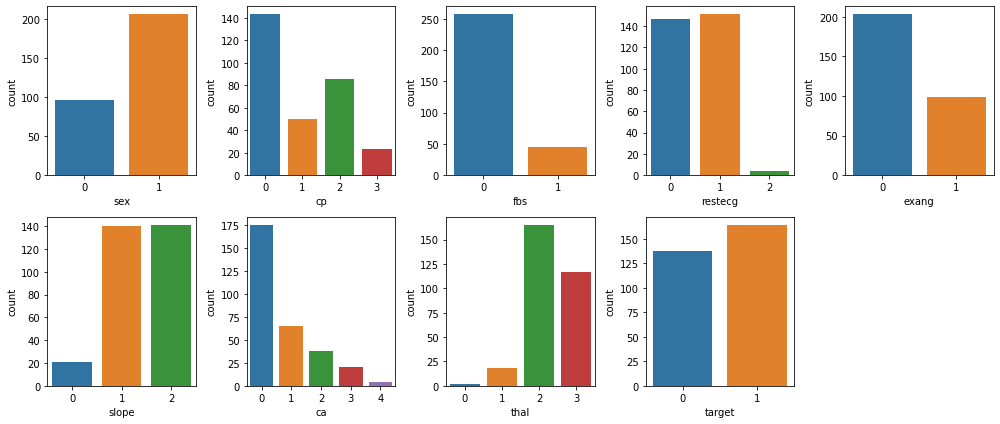

In [13]:
plt.figure(figsize=(14,6))
for i,features in enumerate(categorical_features):
    plt.subplot(2,5,i+1)
    sns.countplot(dataset[features])
    plt.tight_layout()

0 is female
1 is male
for feature 'sex' only

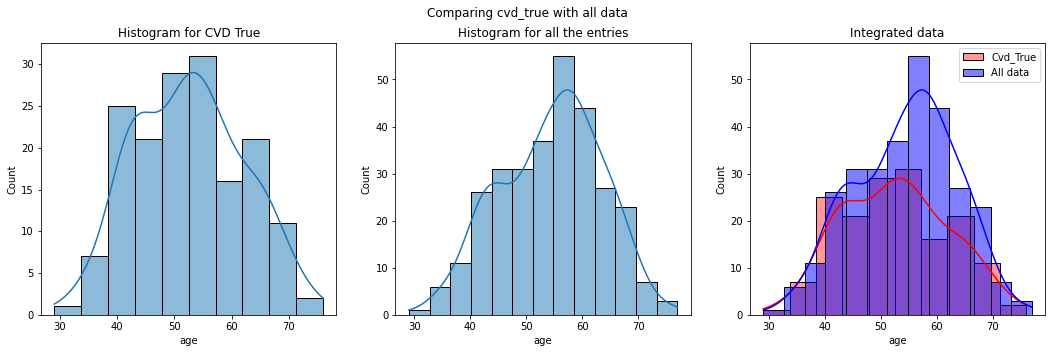

In [14]:
#Study the occurrence of CVD across the Age category
#Here the occurence of CVD states that the cardio vascular disease is true

# Here we have data for only cvd true entries
cvd_true = dataset.loc[dataset.target == 1]

plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.histplot(x=cvd_true.age,kde=True)
plt.title('Histogram for CVD True')
plt.subplot(1,3,2)
sns.histplot(x=dataset.age,kde=True)
plt.title('Histogram for all the entries')
plt.subplot(1,3,3)
sns.histplot(x=cvd_true.age,kde=True,label='Cvd_True',color='red',alpha=0.4)
sns.histplot(x=dataset.age,kde=True,label='All data',color='blue',alpha=0.5)
plt.title('Integrated data')
plt.legend()
plt.suptitle('Comparing cvd_true with all data')
plt.show()

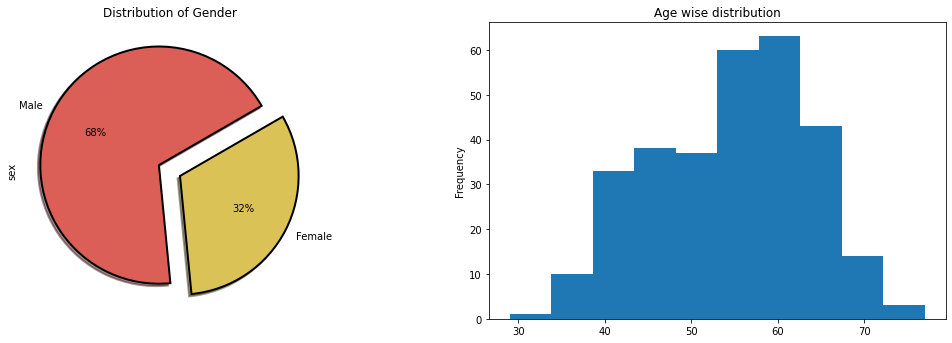

In [17]:
#Study the composition of all patients with respect to the Sex category
#Distribution of Sex and Age category

plt.figure(figsize=(18,12))
plt.subplot(221)
dataset["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("hls",8),startangle = 30,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
dataset["age"].plot.hist()
plt.title("Age wise distribution")
plt.show()

In [18]:
#Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient
# Creating a new dataframe with cvd: False
cvd_false = dataset.loc[dataset.target == 0]

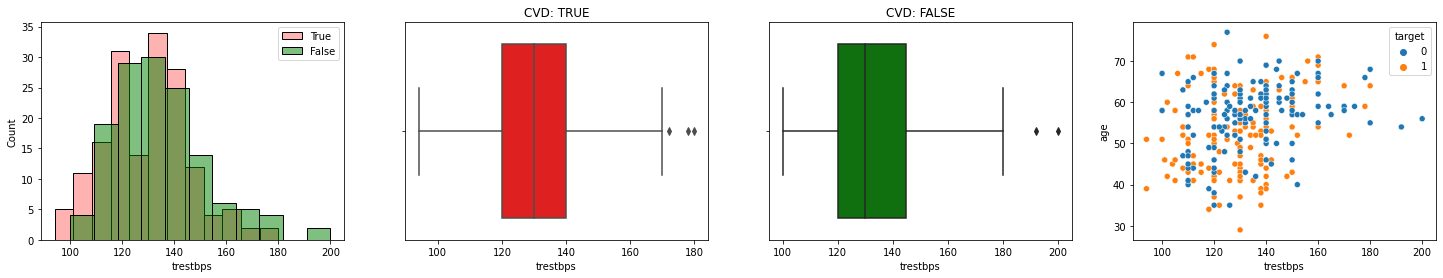

In [19]:
plt.figure(figsize=(25,4))
# PLOTTING SUBPLOT_1
plt.subplot(1,4,1)
sns.histplot(cvd_true.trestbps,color='red',alpha=0.3, label='True')
sns.histplot(cvd_false.trestbps,color='green',alpha=0.5,label='False')
plt.legend()
# PLOTTING SUBPLOT_2
plt.subplot(1,4,2)
sns.boxplot(cvd_true.trestbps,color='red')
plt.title("CVD: TRUE")

# PLOTTING SUBPLOT_3
plt.subplot(1,4,3)
sns.boxplot(cvd_false.trestbps,color='green')
plt.title("CVD: FALSE")

plt.subplot(1,4,4)
sns.scatterplot(y=dataset.age, x=dataset.trestbps,hue=dataset.target)
plt.show()

We observe that people who develop CVD have lower resting bp than people who don't develop CVD, and most develop in the age around 40 - 65

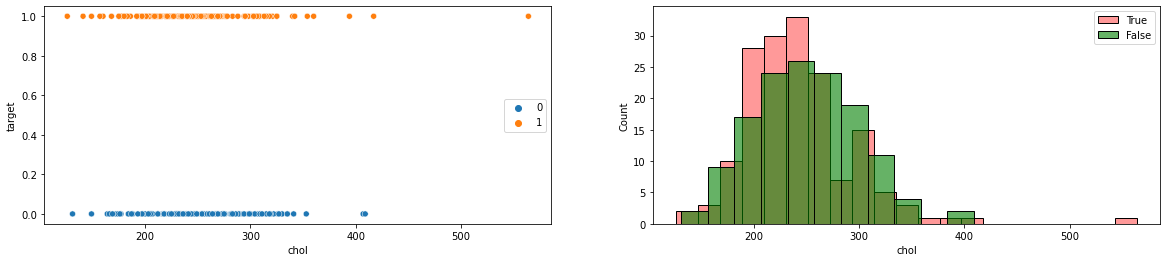

In [20]:
#Describe the relationship between cholesterol levels and a target variable

plt.figure(figsize=(20,4))
plt.subplot(121)
sns.scatterplot(x=dataset.chol, y=dataset.target, hue=dataset.target)
plt.legend(loc='center right')

plt.subplot(122)
sns.histplot(cvd_true.chol, color='r',alpha=0.4,label='True')
sns.histplot(cvd_false.chol, color='green',alpha=0.6,label='False')
plt.legend()

The people who develop CVD have much higher level of cholestrol sometimes and most are concentrated in the range of 200 - 300



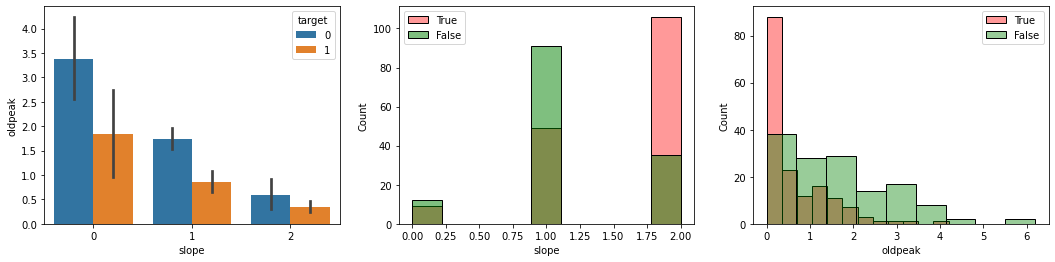

In [23]:
#State what relationship exists between peak exercising and the occurrence of a heart attack

plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
sns.barplot(y=dataset.oldpeak, x=dataset.slope, hue=dataset.target)
plt.subplot(1,3,2)
sns.histplot(cvd_true.slope,color='red',alpha=0.4,label='True')
sns.histplot(cvd_false.slope,color='green',alpha=0.5,label='False')
plt.legend()
plt.subplot(1,3,3)
sns.histplot(cvd_true.oldpeak,color='red',alpha=0.4,label='True')
sns.histplot(cvd_false.oldpeak,color='green',alpha=0.4,label='False')
plt.legend()

<AxesSubplot:xlabel='thal', ylabel='count'>

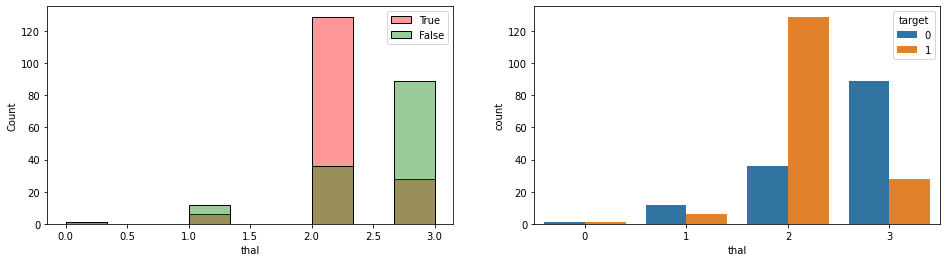

In [24]:
#Check if thalassemia is a major cause of CVD

plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.histplot(cvd_true.thal,color='red',alpha=0.4,label='True')
sns.histplot(cvd_false.thal,color='green',alpha=0.4,label='False')
plt.legend()
plt.subplot(1,2,2)
sns.countplot(dataset.thal,hue=dataset.target)

Thalassemia can be a major cause in CVD as it is seen in more number in 2

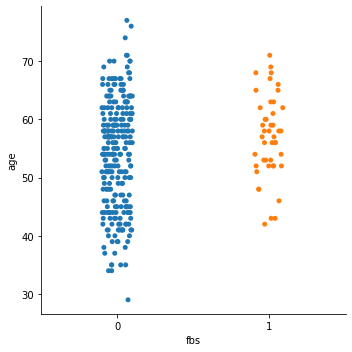

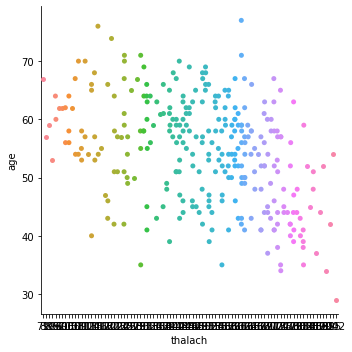

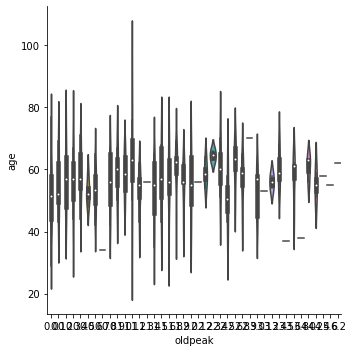

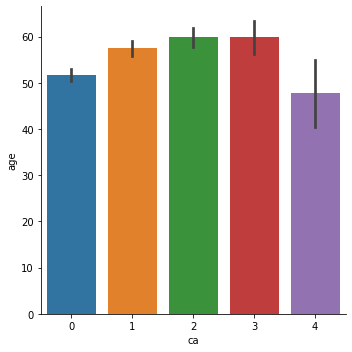

In [26]:
#how the other factors determine the occurrence of CVD

sns.catplot(x ='fbs', y ='age', data = dataset) 
sns.catplot(x ='thalach', y ='age', data = dataset)
plt.show()
sns.catplot(x ='oldpeak', y ='age', data = dataset, kind='violin')
plt.show()
sns.catplot(x ='ca', y ='age', data = dataset, kind='bar')
plt.show()

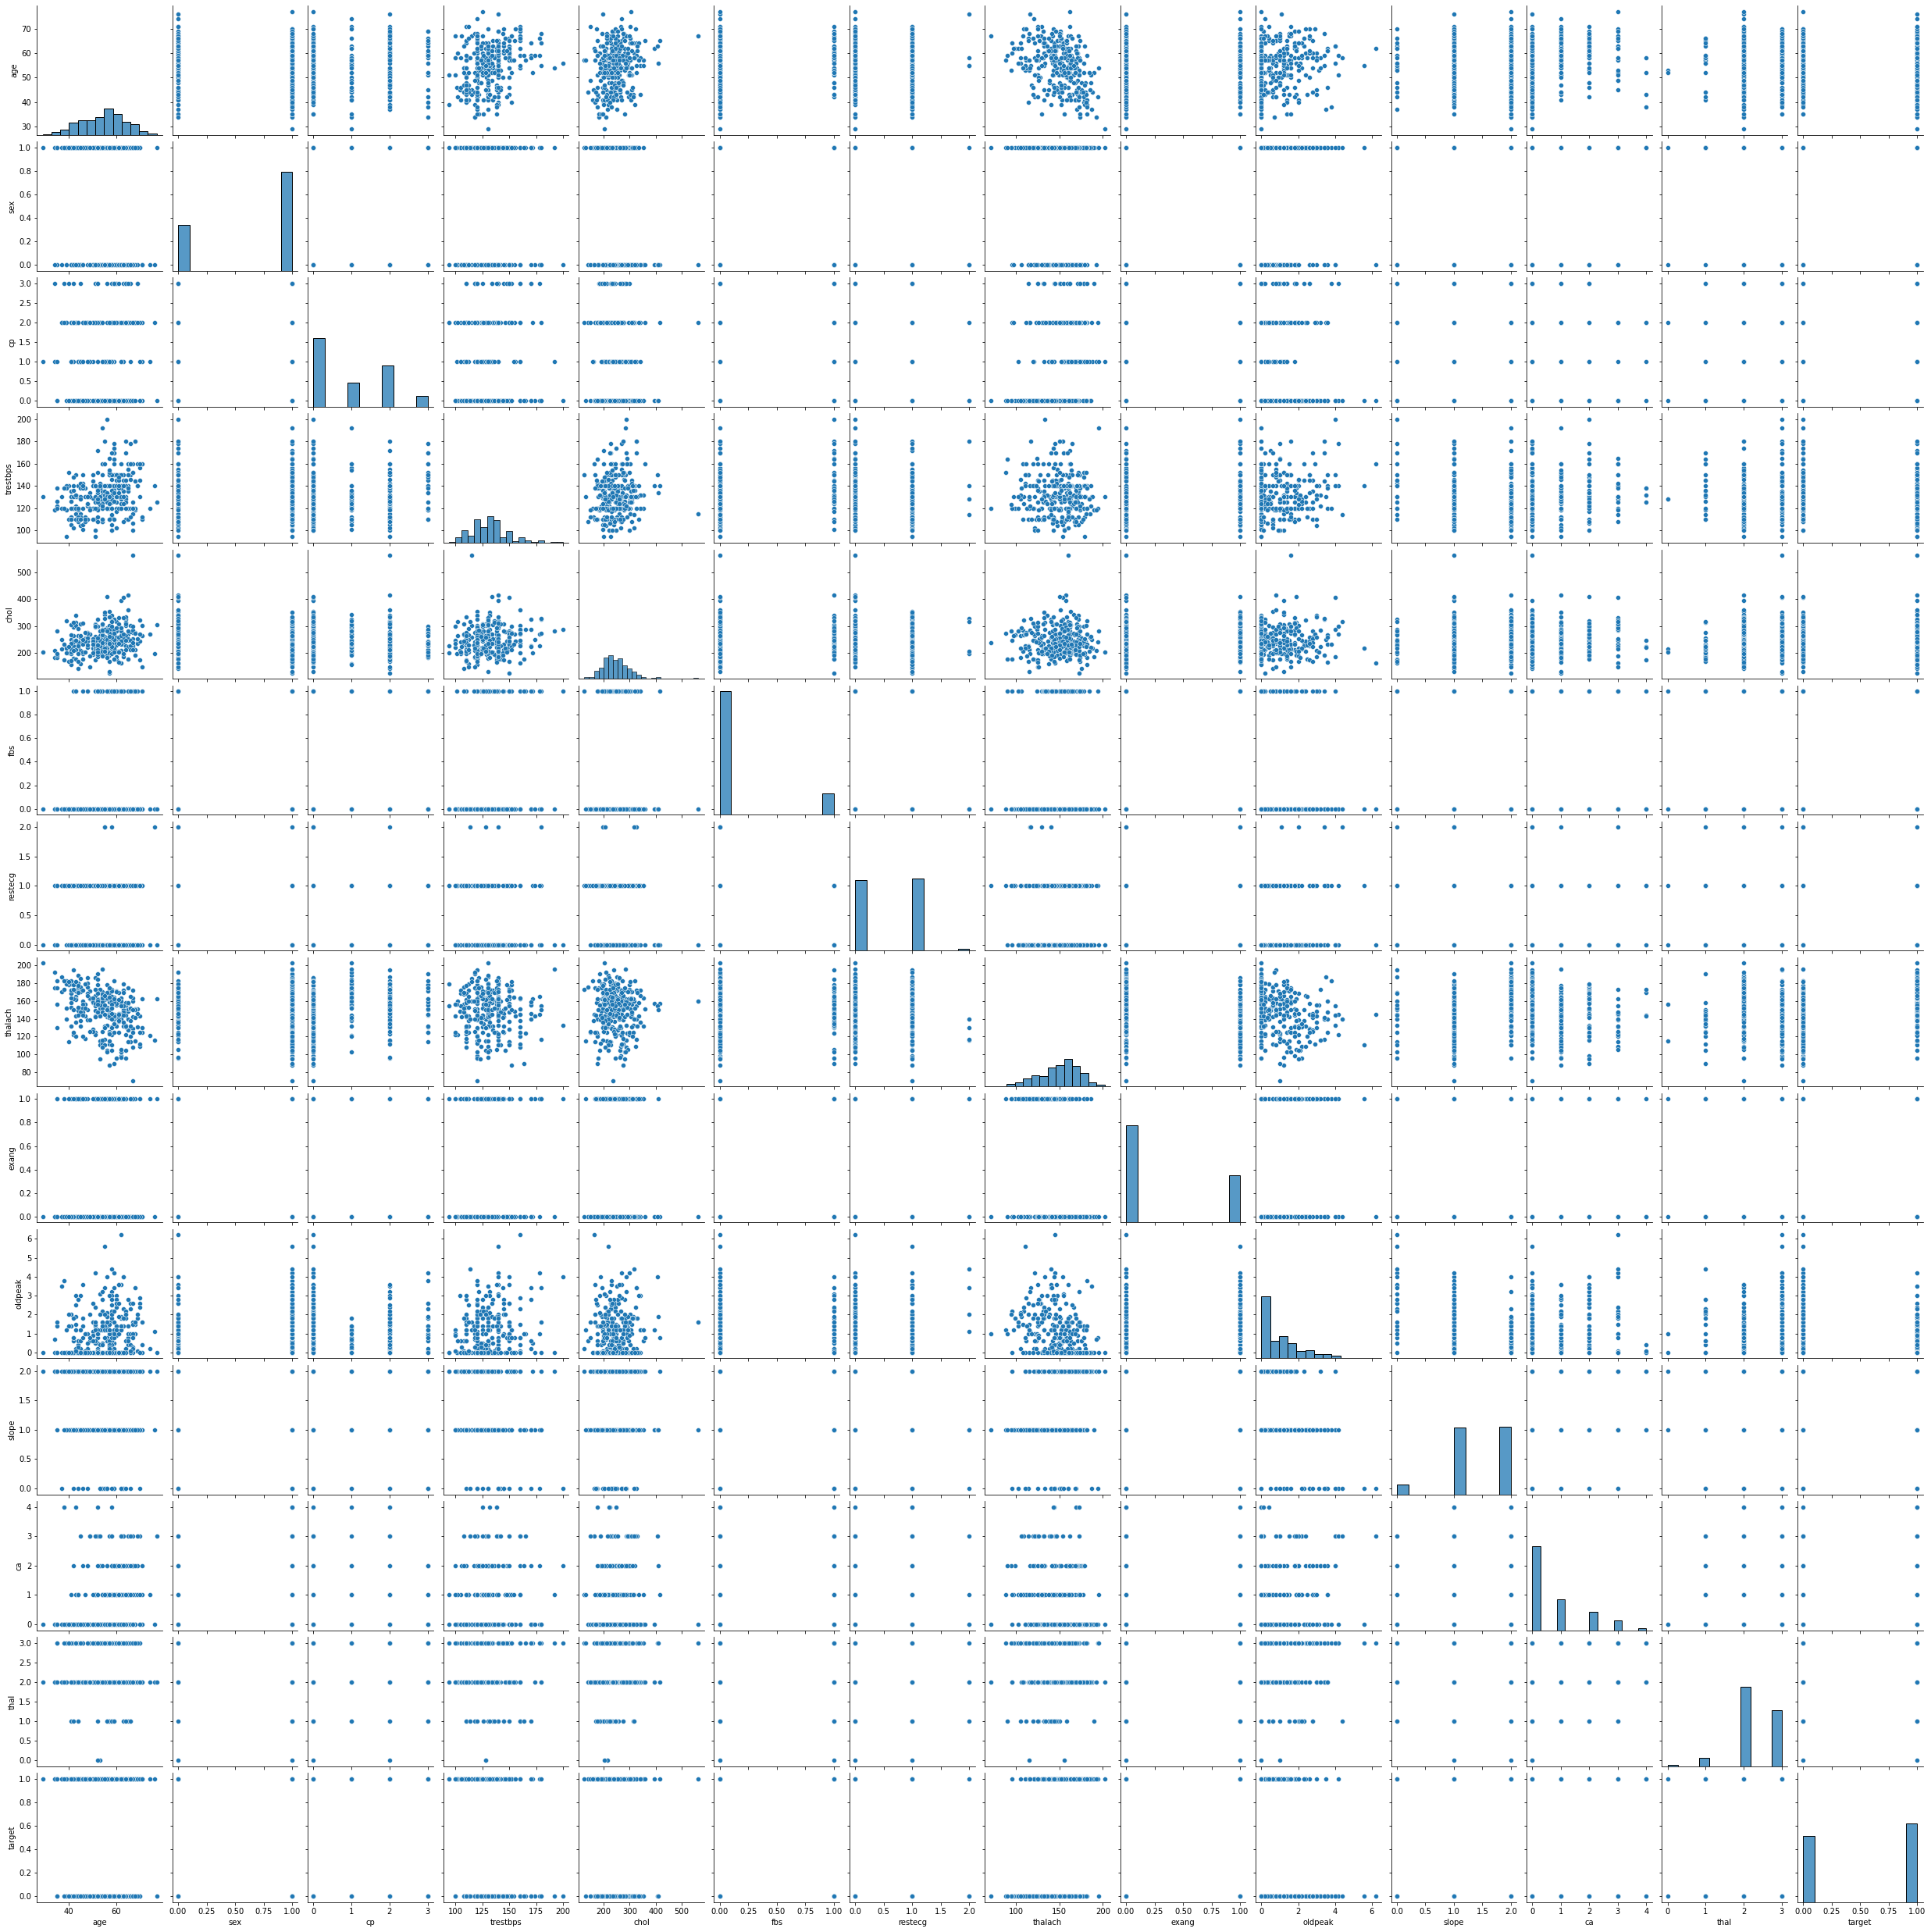

In [25]:
#Use a pair plot to understand the relationship between all the given variables

sns.pairplot(data=dataset)

<AxesSubplot:>

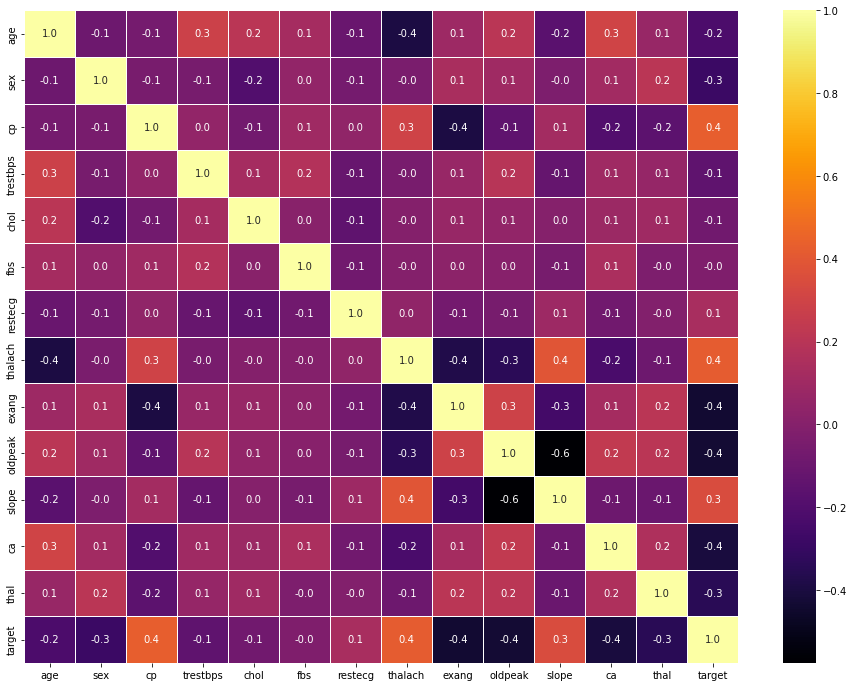

In [27]:
#Plotting a heatmap for correlation

plt.figure(figsize=(16,12))
sns.heatmap(dataset.corr(),annot=True, fmt='.1f', linecolor='white',linewidths= 1.001,cmap='inferno')

In [28]:
#Training and testing

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y = dataset.pop('target')
X = dataset

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 4)

print('X_train:',X_train.shape)
print('X_test :',X_test.shape)
print('y_train:',y_train.shape)
print('y_test :',y_test.shape)


X_train: (211, 13)
X_test : (91, 13)
y_train: (211,)
y_test : (91,)


In [43]:
# Model Training
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression()
log_reg


LogisticRegression()

In [45]:
log_reg = LogisticRegression(max_iter=3000)

log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [46]:
y_pred = log_reg.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0], dtype=int64)

In [49]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {}".format(accuracy))

Test Accuracy: 0.8131868131868132


In [50]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8144444444444444


In [56]:
#Random forest Algorithm

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state = 5)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

In [57]:
y_pred = random_forest.predict(X_test)
print("The test accuracy score of Random Forest is", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is 0.8021978021978022


In [58]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_forest, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8144444444444444


In [30]:
import statsmodels.api as sm
logreg = sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.349166
         Iterations 7


In [31]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  211
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                           12
Date:                Mon, 29 Aug 2022   Pseudo R-squ.:                  0.4953
Time:                        19:12:13   Log-Likelihood:                -73.674
converged:                       True   LL-Null:                       -145.97
Covariance Type:            nonrobust   LLR p-value:                 7.087e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0359      0.025      1.443      0.149      -0.013       0.085
sex           -1.6155      0.527     -3.067      0.002      -2.648      -0.583
cp             0.7427      0.226      3.293      0.0

Accuracy score 0.8021978021978022
Recall score 0.8867924528301887
Precision score 0.7966101694915254
f1 score 0.8392857142857143


<AxesSubplot:>

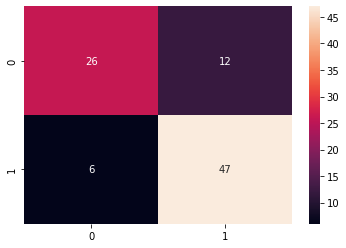

In [33]:
logreg_pred = logreg.predict(X_test)
preds = list(map(round, logreg_pred))
print('Accuracy score',accuracy_score(y_test, preds))
print('Recall score',recall_score(y_test, preds))
print('Precision score',precision_score(y_test, preds))
print('f1 score',f1_score(y_test, preds))
cm = confusion_matrix(y_test,preds)
sns.heatmap(cm,annot=True)

In [34]:
new_features = ['sex','cp','thalach','exang','ca','thal','chol']
new_X = dataset[new_features]
new_X.head()



,sex,cp,thalach,exang,ca,thal,chol
0,1,3,150,0,0,1,233
1,1,2,187,0,0,2,250
2,0,1,172,0,0,2,204
3,1,1,178,0,0,2,236
4,0,0,163,1,0,2,354


In [35]:
X1_train, X1_test, y1_train, y1_test = train_test_split(new_X, y, test_size = 0.3, random_state=5)

print('X1_train:',X1_train.shape)
print('X1_test :',X1_test.shape)
print('y1_train:',y1_train.shape)
print('y1_test :',y1_test.shape)

X1_train: (211, 7)
X1_test : (91, 7)
y1_train: (211,)
y1_test : (91,)


In [36]:
logreg1 = sm.Logit(y1_train, X1_train).fit()

Optimization terminated successfully.
         Current function value: 0.374504
         Iterations 7


In [37]:
print(logreg1.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  211
Model:                          Logit   Df Residuals:                      204
Method:                           MLE   Df Model:                            6
Date:                Mon, 29 Aug 2022   Pseudo R-squ.:                  0.4558
Time:                        19:13:39   Log-Likelihood:                -79.020
converged:                       True   LL-Null:                       -145.21
Covariance Type:            nonrobust   LLR p-value:                 4.065e-26
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -1.7074      0.519     -3.291      0.001      -2.724      -0.690
cp             0.7575      0.203      3.733      0.000       0.360       1.155
thalach        0.0349      0.008      4.515      0.0

Accuracy score 0.8131868131868132
Recall score 0.875
Precision score 0.7924528301886793
f1 score 0.8316831683168316


<AxesSubplot:>

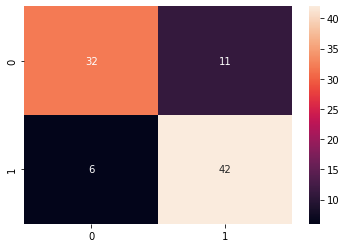

In [39]:
logreg1_pred = logreg1.predict(X1_test)
preds1 = list(map(round, logreg1_pred))

print('Accuracy score',accuracy_score(y1_test, preds1))
print('Recall score',recall_score(y1_test, preds1))
print('Precision score',precision_score(y1_test, preds1))
print('f1 score',f1_score(y1_test, preds1))
cm = confusion_matrix(y1_test,preds1)
sns.heatmap(cm,annot=True)

In [40]:
# Random Forests with original data

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=5,)
cv_score = cross_val_score(rfc, X, y, cv=5)
print(cv_score)
print('\nAverage score: ',cv_score.mean())

[0.83606557 0.8852459  0.83333333 0.78333333 0.75      ]

Average score:  0.8175956284153006


In [41]:
#Random Forests with selected data

rfc1 = RandomForestClassifier(random_state=6)
cv_score1 = cross_val_score(rfc1, new_X, y, cv=5)
print(cv_score1)
print('\nAverage score: ',cv_score1.mean())

[0.81967213 0.91803279 0.81666667 0.81666667 0.75      ]

Average score:  0.8242076502732241
